In [56]:
#導入相關模組
import json
import random
import re

import jieba
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

#CKIPtagger導入要用的模組，分別有「WS（斷詞）」、「POS（詞性標注）」及「NER（實體辨識）」與「construct__dictionary(自建辭典)」四個功能。
from ckiptagger import construct_dictionary, WS, POS, NER
ws = WS('E:/Python 3.7/pyetl/Demodb0103/gym/data')
pos = POS('E:/Python 3.7/pyetl/Demodb0103/gym/data')
ner = NER('E:/Python 3.7/pyetl/Demodb0103/gym/data')

#讀取要段詞的json檔
DATASET_DIR = 'E:/Python 3.7/pyetl/Demodb0103/gym/data/gymz.json'
with open(DATASET_DIR, encoding='utf8') as f:
    dataset = json.load(f)
    
import time 

In [57]:
#讀取停止詞典
STOP_WORDS_DIR = 'E:/Python 3.7/pyetl/Demodb0103/gym/data/stopWords.txt'
with open(STOP_WORDS_DIR, encoding='utf8') as f:
    stop_words = f.read().splitlines() 

In [58]:
#抽出文章的標題與內容
content_list = list(map(lambda d: d['content'], dataset))
title_list = list(map(lambda d: d['title'], dataset))

In [59]:
#設自建辭典，並給予權重
word_to_weight1 = {
    "胸肌": 3,
    "胸部": 3,
    "肩膀": 3,
    "背肌": 3,
    "背部": 3,
    "手臂": 3,
    "腹肌": 3,
    "腹部": 3,
    "核心": 3,
    "腿部": 3,
    "深蹲": 3,
    "硬舉": 3,
    "臥推": 3,
    "啞鈴": 3,
    "有氧運動": 3,
    "徒手訓練": 3,
    "徒手": 3,
    "肌肉": 3,
    "重訓": 3,
    "健身": 3,
    "弓箭步": 3,
    "伏地挺身": 3,
    "引體向上": 3,
    "棒式": 3,
    "仰臥起坐": 3,
    "捲腹": 3,
    "跑步": 3,
    "開合跳": 3,  
    "橋式": 3,
    "增肌": 2,
    "減脂": 2,
}
dictionary1 = construct_dictionary(word_to_weight1)

word_to_weight2 = {
    "胸": 3,
    "上胸": 2,
    "下胸": 2,
    "肩": 3,
    "手": 3,
    "腿": 3,
    "斜方肌": 2,
    "二頭肌": 2,
    "三頭肌": 2,
    "小腿肌群": 2,
    "臀大肌": 2,
    "大腿肌": 2,
    "大腿後肌": 2,
    "胸大肌": 2,
    "前三角": 2,
    "肱三頭": 2,
    "中三角": 2,
    "三角肌": 2,
    "後三角": 2,
    "棘上肌": 2,
    "小圓肌": 2,
    "棘下肌": 2,
    "中斜方": 2,
    "菱形肌": 2,
    "肱二頭": 2,
    "背闊肌": 2,
    "豎棘肌": 2,
    "股四頭": 2,
    "腿後建肌群": 2,
    "核心肌群": 3,
    "腿內收肌群": 2,
    "臀中肌": 2,
    "緋腸肌": 2,
    "比目魚肌": 2,
    "腹直肌": 2,
    "腹橫肌": 2,
    "單邊弓箭步": 3,
    "上斜伏地挺身": 3,
    "下斜伏地挺身": 3,
    "暴力上槓": 3,
    "棒式撐體": 3,
    "反向捲腹": 3,
    "槓鈴": 2,
    "繩索": 1,
    "戰神": 1,
    "沙袋": 1,
    "按摩池": 1,
    "機械": 1,
    "跑步機": 1,
    "踏步機": 1,
    "飛輪腳踏車": 1,
    "交叉滑步訓練機": 1,
    "坐姿推胸機": 1,
    "肩部推舉機": 1,
    "坐姿划船機": 1,
    "旋轉訓練機": 1,
    "臂部複合訓練機": 1,
    "腿部外彎機": 1,
    "腿部內彎機": 1,
    "垂直蹬腿練習器": 1,
    "羅馬凳": 1,
    "單杠提膝器": 1,
    "背肌訓練機": 1,
    "心肺適能訓練": 1,
    "上斜跑步機": 1,
    " 跳繩": 1,
    "胸推": 1,
    "館長": 1,
    "胸飛鳥": 1,
    "上斜胸推": 1,
    "上斜飛鳥": 1,
    "下斜胸推": 1,
    "下斜飛鳥": 1,
    "肩推": 1,
    "前平舉": 1,
    "側平舉": 1,
    "二頭彎舉": 1,
    "反向飛鳥": 1,
    "內旋": 1,
    "外旋": 1,
    "滑輪下拉": 1,
    "反手": 1,
    "寬握": 1,
    "正常握": 1,
    "窄握": 1,
    "高划船": 1,
    "仰臥臂屈伸": 1,
    "俯身划船": 1,
    "單臂划船": 1,
    "單邊深蹲": 2,
    "腿推": 1,
    "腿伸": 1,
    "腿曲": 1,
    "腿內收訓練": 1,
    "腿外展訓練": 1,
    "臀部伸展訓練": 1,
    "舉重": 1,
    "組數": 1,
    "次數": 1,
    "節奏": 1,
    "休息": 1,
    "健身營養補給品": 1,
    "乳清蛋白": 1,
    "蛋白質營養棒": 1,
    "支鏈氨基酸": 1,
    "蛋白質": 1,
    "碳水化合物": 1,
    "鈉": 1,
    "脂肪": 1,
    "結實的": 2,
    "身材健美的": 2,
    "健康": 1,
    "精實的": 1,
    "肌肉拉傷": 2,
    "健身狂人": 2,
    "健身房會員": 1,
    "隱形肥胖": 2,
    "肥胖": 2,
    "脂肪過量": 2,
    "低體重": 2,
    "標準體型": 2,
    "肌肉型": 2,
    "運動員型": 2,
    "運動員": 2,
    "低脂肪": 2,
    "肘伸展": 1,
    "生酮": 1,
}
dictionary2 = construct_dictionary(word_to_weight2)


In [60]:
#替換不需要的句子，並正規化
# start = time.clock()
gym_list =[]
for i in content_list:
    i = re.sub('※ 發信站: 批踢踢實業坊',' ', i)
    i = re.sub('※ 文章網址:',' ', i)
    i = re.sub('※ 編輯:',' ', i)
    i = re.sub('(臺灣)',' ', i)
    i = re.sub('來自:',' ', i)
    #只保留中文
    rule = re.compile(r"[^\u4e00-\u9fa5]")
    i = rule.sub('', i)
    gym_list.append(i)


In [61]:
#進行ckip中研院斷詞
word_s = ws(gym_list,
            #考慮分隔符
            sentence_segmentation=True,
            #recommend_dictionary參考詞典
            recommend_dictionary = dictionary2,
            #coerce_dictionary強制詞典
            coerce_dictionary = dictionary1,
            #斷詞參考符號
            segment_delimiter_set={'?', '？', '!', '！', '。', ',',   
                                   '，', ';', ':', '、'})


In [62]:
#去除停止詞
for idx, speech in enumerate(word_s):
    word_s[idx] = ' '.join([word for word in speech if word not in stop_words])
# end = time.clock()
# print('運行時間: ' + str(end - start))

In [63]:
# 使用 tf-idf 向量化
#TfidfTransformer + CountVectorizer = TfidfVectorizer
# 需要設置（sublinear_tf = True，use_idf = True）使特徵值近似於高斯分佈
# ，這能彌補LSA對於文本數據的錯誤的替代假設
# stopwords=[]
tfidf_vectorizer = TfidfVectorizer(max_features = None,
                                   sublinear_tf=True, 
                                   use_idf=True,
#                                    stop_words=stopwords,
                                   max_df=0.8,
                                   min_df=20,
                                   ngram_range=(1, 4))
                                   
#將算出的tf-idf 先擬合數據，然後轉化為其其轉化為標準形式
tfidf = tfidf_vectorizer.fit_transform(word_s)
# 將tf-idf矩陣抽取出來，元素w [i] [j]表示j詞在i類文本中的tf-idf權重
tfidf1 = tfidf.toarray()

In [64]:
tfidf.shape

(19626, 8005)

In [92]:
#使用LSA語意分析降維
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import Normalizer
import pandas as pd
#使用TruncatedSVD,把原先規模為(文字數，詞彙數)的特徵矩陣X化為規模為(文字數，主題數)的新特徵矩陣X2：
#(由於主題數一般比詞彙數少，這一方法也可以用來降維，以進行分類或聚類操作)
lsa_model = TruncatedSVD(n_components=100, algorithm='arpack')
lsa_vecs = lsa_model.fit_transform(tfidf)
#使用Normalization(正則化)，形成獨立同分佈與白化
lsa_vecs = Normalizer(copy=False).fit_transform(lsa_vecs)

#顯示關鍵字lsa表格
feature_names = tfidf_vectorizer.get_feature_names()
lsa_df = pd.DataFrame(lsa_model.components_.round(5), columns=feature_names)

In [93]:
lsa_vecs.shape

(19626, 100)

KMeans分群

In [94]:
# import numpy as np
# np.random.seed(123)
#跑KMeans分群用簇內誤方差（SSE）決定最佳分群數k
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
wcss = []
for k in range(2, 20):
    kmeans = KMeans(n_clusters=k, init='k-means++',n_jobs=-1)
    kmeans.fit(lsa_vecs)
    wcss.append(kmeans.inertia_)
    print('k={}, inertia={}'.format(k, kmeans.inertia_))

k=2, inertia=17044.95450602351
k=3, inertia=16626.999300363128
k=4, inertia=16286.12488933365
k=5, inertia=16056.453093509626
k=6, inertia=15827.759017246735
k=7, inertia=15637.649568373623
k=8, inertia=15493.61977566545
k=9, inertia=15280.712375246309
k=10, inertia=15123.116962242257
k=11, inertia=14969.696776413457
k=12, inertia=14859.516105019535
k=13, inertia=14711.383108839746
k=14, inertia=14587.076226567771
k=15, inertia=14488.757960947176
k=16, inertia=14324.827533381422
k=17, inertia=14219.399215120036
k=18, inertia=14105.571969749517
k=19, inertia=13997.684835614511


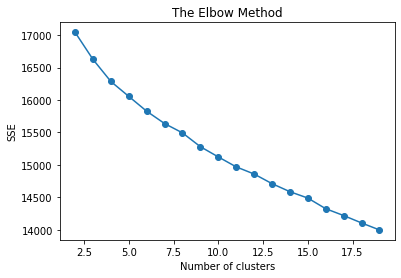

In [95]:
#畫圖
plt.plot(range(2, 20), wcss,marker="o")
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.show()

In [96]:
#K-Means, k=10
kmeans = KMeans(n_clusters=10, init='k-means++',n_jobs=-1)
kmeans.fit(lsa_vecs)
clusters = kmeans.predict(lsa_vecs)

In [97]:
#基於通過LSA創建的2個潛在維度的10個群集。
kmeans.cluster_centers_.shape

(10, 100)

In [98]:
#探索原始尺寸
original_space_centroids = lsa_model.inverse_transform(kmeans.cluster_centers_)
original_space_centroids.shape

(10, 8005)

In [99]:
order_centroids = original_space_centroids.argsort()[:, ::-1]
order_centroids.shape

(10, 8005)

In [100]:
#檢查每個群集中的前10個TF-IDF功能
for cluster in range(10):
    features = order_centroids[cluster,0:5]
    print('Cluster {}\n'.format(cluster))
    for feature in features:
        print(feature_names[feature])
    print('\n')

Cluster 0

最近
真的
運動
巨巨
謝謝


Cluster 1

飲食
熱量
體重
減脂
蛋白質


Cluster 2

啞鈴
臥推
槓鈴
重量
啞鈴 臥推


Cluster 3

面交
空桶
全新
自取
地點


Cluster 4

口味
乳清
巧克力
味道
奶茶


Cluster 5

請問
謝謝
巨巨
請問 巨巨
健身


Cluster 6

訓練
動作
肌肉
深蹲
重量


Cluster 7

教練
健身
推薦
教練課
課程


Cluster 8

活動
醫師
心臟
情況
疾病


Cluster 9

健身
運動
最近
器材
真的




In [ ]:
#跑KMeans分群用labels決定最佳分群數k
# from sklearn.metrics import silhouette_score
# from sklearn.cluster import KMeans
# import matplotlib.pyplot as plt
# %matplotlib inline


# scores = [] 
# ks = []

# for k in range(2, 20): 
#     clu = KMeans(n_clusters = k,init='k-means++',n_jobs=-1) 
#     clu.fit(lsa_vecs) 
#     clu_score = silhouette_score(lsa_vecs, clu.labels_) 
#     scores.append(clu_score) 
#     ks.append(k)
# print("分數:", scores) 
# print("K 值:", ks) 
# plt.plot(scores, ks)

MiniBatchKMeans分群

In [ ]:
# # import numpy as np
# # np.random.seed(123)
# #跑MiniBatchKMeans分群用簇內誤方差（SSE）決定最佳分群數k
# from sklearn.cluster import MiniBatchKMeans
# wcss = []
# for k in range(2, 20):
#     kmeans = MiniBatchKMeans(n_clusters=k, init='k-means++')
#     kmeans.fit(lsa_vecs)
#     wcss.append(kmeans.inertia_)
#     print('k={}, inertia={}'.format(k, kmeans.inertia_))
# plt.plot(range(2, 20), wcss,marker="o")
# plt.title('The Elbow Method')
# plt.xlabel('Number of clusters')
# plt.ylabel('SSE')
# plt.show()

In [ ]:
# #畫圖
# plt.plot(range(2, 20), wcss,marker="o")
# plt.title('The Elbow Method')
# plt.xlabel('Number of clusters')
# plt.ylabel('SSE')
# plt.show()

In [105]:
#載入原檔
import pandas as pd

df = pd.read_csv('E:/Python 3.7/pyetl/Demodb0103/gym/data/ptt_2018-2019_z.csv')

In [106]:
#查看前10筆
df.head(10)

,0,title,content
0,1,[問題] 藥球轉動時像有沙在裡面流動是正常的嗎,\n最近網購了一個愛迪達的藥球\nhttps://imgur.com/uzZgZrj\n今天...
1,2,Re: [討論] 有人聽過血糖震盪嗎,\n※ 引述《Huangrh (牽手，一直走下去)》之銘言：\n: ※ 引述《isud404...
2,3,[減肥] 運動項目和飲食請益,\n基本資料\n\n性別：女\n年齡：29\n身高：159\n體重：54\nBMI：21.5...
3,4,Re: [問題] 為什麼台灣普遍不推薦減脂做有氧?,\n不討論複雜的機轉，\n\n一來難懂，二來有爭議，\n\n所以純粹看結論就好。\n\n\n...
4,5,[閒聊] 在家運動,\n\n\n\n\n\n 是這樣的.\n 團體有氧舞蹈畢竟是有參...
5,6,[新聞] 防彈咖啡減重？ 醫：成份不明恐傷身,\n防彈咖啡減重？ 醫：成份不明恐傷身\nhttps://reurl.cc/b627X6\n...
6,7,[心得] 給新手的一些建議,\n之前我在寫置底文的時候，是希望給新手一些簡短有力的指導方針，\n不過這幾個禮拜看文下來，...
7,8,Re: [問題] 減肥的迷思??,\n終於完成了，感謝大家的幫忙與支持，\n集思廣益，謝謝大家提供許多寶貴意見，\n小弟將他總...
8,9,[問題] 好市多烤雞大腿熱量(去皮),\n雞胸肉吃久了，想要換換口味\n剛好今天去好市多買冷凍青花菜，順便就拿了一袋烤雞腿，\n\...
9,10,[問題] 為什麼台灣普遍不推薦減脂做有氧?,\n如提\n\n我看台灣大部分的健身型Youtuber幾乎都不推薦做有氧\n\n原因不外乎是...


In [107]:
#進行貼標
df["label"] = kmeans.labels_
#能計算欄位內元素的頻度
from collections import Counter
# 看一下df["label"]內元素的出現頻度
Counter(df["label"])

Counter({0: 3673,
         1: 3446,
         2: 994,
         3: 1180,
         4: 901,
         5: 1891,
         6: 3082,
         7: 1559,
         8: 274,
         9: 2626})

In [108]:
#查看前10筆
df.head(10)

,0,title,content,label
0,1,[問題] 藥球轉動時像有沙在裡面流動是正常的嗎,\n最近網購了一個愛迪達的藥球\nhttps://imgur.com/uzZgZrj\n今天...,5
1,2,Re: [討論] 有人聽過血糖震盪嗎,\n※ 引述《Huangrh (牽手，一直走下去)》之銘言：\n: ※ 引述《isud404...,1
2,3,[減肥] 運動項目和飲食請益,\n基本資料\n\n性別：女\n年齡：29\n身高：159\n體重：54\nBMI：21.5...,8
3,4,Re: [問題] 為什麼台灣普遍不推薦減脂做有氧?,\n不討論複雜的機轉，\n\n一來難懂，二來有爭議，\n\n所以純粹看結論就好。\n\n\n...,1
4,5,[閒聊] 在家運動,\n\n\n\n\n\n 是這樣的.\n 團體有氧舞蹈畢竟是有參...,0
5,6,[新聞] 防彈咖啡減重？ 醫：成份不明恐傷身,\n防彈咖啡減重？ 醫：成份不明恐傷身\nhttps://reurl.cc/b627X6\n...,1
6,7,[心得] 給新手的一些建議,\n之前我在寫置底文的時候，是希望給新手一些簡短有力的指導方針，\n不過這幾個禮拜看文下來，...,1
7,8,Re: [問題] 減肥的迷思??,\n終於完成了，感謝大家的幫忙與支持，\n集思廣益，謝謝大家提供許多寶貴意見，\n小弟將他總...,1
8,9,[問題] 好市多烤雞大腿熱量(去皮),\n雞胸肉吃久了，想要換換口味\n剛好今天去好市多買冷凍青花菜，順便就拿了一袋烤雞腿，\n\...,1
9,10,[問題] 為什麼台灣普遍不推薦減脂做有氧?,\n如提\n\n我看台灣大部分的健身型Youtuber幾乎都不推薦做有氧\n\n原因不外乎是...,1


In [133]:
#進行存檔
df.to_csv("E:/Python 3.7/pyetl/Demodb0103/gym/data/分群/ptt_2018-2019_z2.csv"
                   , encoding="utf-8", index=False)

In [134]:
#進行存檔
df.to_excel("E:/Python 3.7/pyetl/Demodb0103/gym/data/分群/ptt_2018-2019_z2.xlsx"
                   , encoding="utf-8", index=False)